### Finding Optimum K for KNN using cross-validation

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
## MyFunctions.py must have a decBoundary() function defined. This was a homework

## from MyFunctions import decBoundary

In [3]:
### Function to draw decision boundary
def decBoundary(clf,features,target, h, filled=True):   
    '''
    Function to draw decision boundary as well as data points given by features, with classes target
    Input: 
       clf: classifier fitted with (features,target) training set  
       features (2 columns): coordinates for scatter plot data
       target: classification of each data point in the scatterplot data
       h: grid size
       filled: True for filled contour, False for unfilled
    '''
    xmin=np.min(features[:,0])
    xmax=np.max(features[:,0])
    ymin=np.min(features[:,1])
    ymax=np.max(features[:,1])
    xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if (filled):
        plt.contourf(xx, yy, Z, cmap='winter', alpha=.6)
    else:
        plt.contour(xx, yy, Z, cmap='winter', alpha=.6)
    plt.scatter(features[:,0], features[:,1],c=target,s=20,cmap='autumn')
    plt.show()

In [4]:
d6=pd.read_csv("mlfolder/CSV_Files/data6_processed.csv")

In [5]:
d6.head(3)

,x,y,t
0,196.639686,392.623867,0
1,189.524100,398.693889,0
2,184.801730,398.852495,0


In [6]:
X=np.c_[d6["x"],d6["y"]]
y=d6["t"] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [8]:
knn=KNeighborsClassifier()

In [9]:
from sklearn.model_selection import GridSearchCV

### We set up a parameter grid to search. For KNN, we just give a range of n_neighbors parameters to search

In [10]:
param_grid = {
    'n_neighbors':np.arange(1,21,2)
}

In [11]:
grid_search = GridSearchCV(
    knn, param_grid, cv=10, scoring='accuracy')

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='accuracy')

In [13]:
grid_search.best_score_

np.float64(0.8816666666666666)

In [14]:
grid_search.best_estimator_.n_neighbors  ##optimal # of neighbors

np.int64(15)

In [15]:
p=grid_search.predict(X_test)

In [16]:
np.sum(p==y_test)/len(y_test)  ##accuracy of prediction of test set

np.float64(0.9133333333333333)

In [17]:
bestKNN=grid_search.best_estimator_

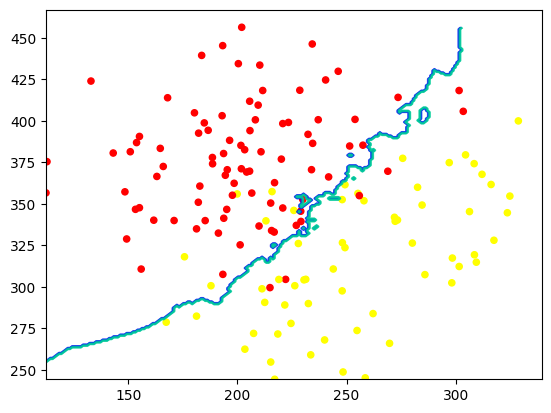

In [18]:
decBoundary(bestKNN, X_test, y_test,1, filled=False)

In [19]:
X=np.c_[d6["x"],d6["y"]]
y=d6["t"]  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1, random_state=4)

In [20]:
len(y_test)

75

In [21]:
knn= KNeighborsClassifier()

In [22]:
grid_search = GridSearchCV(
    knn, param_grid, cv=10, scoring='f1')

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='f1')

In [24]:
p=grid_search.predict(X_test)

In [25]:
np.sum(p==y_test)/len(y_test)

np.float64(0.88)

In [27]:
grid_search.best_estimator_.n_neighbors

np.int64(15)

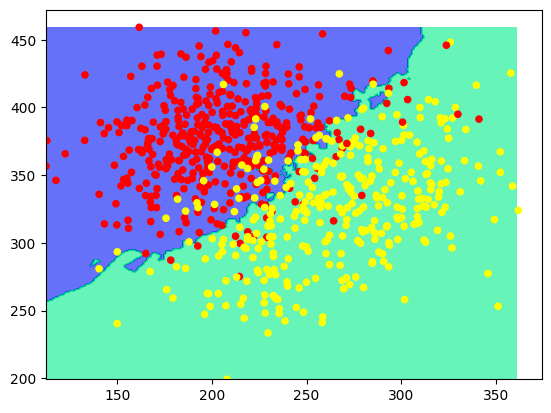

In [28]:
decBoundary(grid_search.best_estimator_,X, y,1)

In [29]:
?decBoundary

Signature: decBoundary(clf, features, target, h, filled=True)
Docstring:
Function to draw decision boundary as well as data points given by features, with classes target
Input: 
   clf: classifier fitted with (features,target) training set  
   features (2 columns): coordinates for scatter plot data
   target: classification of each data point in the scatterplot data
   h: grid size
   filled: True for filled contour, False for unfilled
File:      /tmp/ipykernel_824460/4204450561.py
Type:      function